<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/multipleMinimumFrequentPatterns/basic/CFPGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Frequent patterns in Transactional Databases using CFPGrowth Algorithm

In this tutorial, we will discuss the first approaches to find frequent patterns in big data using CFPGrowth algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single LS value

***

## <a id='basicApproach'>Basic approach: Executing CFPGrowth on a single dataset at a particular LS value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 0.1 : Downloading the inputFile

In [2]:
!wget https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv

--2023-12-20 01:24:00--  https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.95.161.176, 150.31.244.160
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.95.161.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4019277 (3.8M) [text/csv]
Saving to: ‘Transactional_T10I4D100K.csv’

Transactional_T10I4 100%[===================>]   3.83M  1023KB/s    in 5.7s    

2023-12-20 01:24:07 (685 KB/s) - ‘Transactional_T10I4D100K.csv’ saved [4019277/4019277]



#### Step 0.2 : Creating an MIS_T10.txt File

In [3]:
from PAMI.extras.calculateMISValues import usingBeta as ub
inputFile = "Transactional_T10I4D100K.csv"
beta = 0.8
LS = 2000
sep = "\t"
output = "MIS_T10.txt"
cd = ub.usingBeta(inputFile, beta, LS, sep)
cd.calculateMIS()
cd.save(output)

#### Step 1: Import the CFPGrowth algorithm

In [4]:
from PAMI.multipleMinimumSupportBasedFrequentPattern.basic import CFPGrowth as alg

#### Step 2: Specify the following input parameters

In [5]:
inputFile = 'Transactional_T10I4D100K.csv'

MIS = 'MIS_T10.txt'

seperator='\t'

#### Step 3: Execute the CFPGrowth algorithm

In [6]:
obj = alg.CFPGrowth(iFile=inputFile, MIS=MIS, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

870
Frequent patterns were generated successfully using basic algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [7]:
obj.save(outFile='frequentPatternsLSCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [8]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns

In [9]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 155


##### Step 5.2: Runtime consumed by the mining algorithm

In [10]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 128.74330115318298


##### Step 5.3: Total Memory consumed by the mining algorithm

In [11]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 436166656
Memory (USS): 413044736


# Advanced Tutorial on Implementing CFPGrowth Algorithm

In this tutorial, we will discuss the second approach to find frequent patterns in big data using CFPGrowth algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover frequent patterns using multiple LS values.

***

#### In this tutorial, we explain how the CFPGrowth algorithm can be implemented by varying the LS values

#### Step 1: Import the CFPGrowth algorithm and pandas data frame

In [12]:
from PAMI.multipleMinimumSupportBasedFrequentPattern.basic import CFPGrowth as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [13]:
inputFile = 'Transactional_T10I4D100K.csv'
seperator='\t'
LSList = [2000, 2500, 3000, 3500, 4000]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of CFPGrowth algorithm

#### Step 3: Execute the CFPGrowth algorithm using different LS values

In [14]:
for LS in LSList:
  from PAMI.extras.calculateMISValues import usingBeta as ub
  inputFile = "Transactional_T10I4D100K.csv"
  beta = 0.8
  LS = LS
  sep = "\t"
  output = "MIS_T10.txt"
  cd = ub.usingBeta(inputFile, beta, LS, sep)
  cd.calculateMIS()
  cd.save(output)
  obj = alg.CFPGrowth(iFile=inputFile, MIS=MIS, sep=seperator)
  obj.startMine()
#store the results in the data frame
  result.loc[result.shape[0]] = ['CFPGrowth', LS, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


870
Frequent patterns were generated successfully using basic algorithm
870
Frequent patterns were generated successfully using basic algorithm
870
Frequent patterns were generated successfully using basic algorithm
870
Frequent patterns were generated successfully using basic algorithm
870
Frequent patterns were generated successfully using basic algorithm


In [15]:
print(result)

   algorithm  minSup  patterns     runtime     memory
0  CFPGrowth    2000       155  122.919971  440799232
1  CFPGrowth    2500       107   35.060563  398888960
2  CFPGrowth    3000        60    6.269619  360394752
3  CFPGrowth    3500        40    4.511682  380936192
4  CFPGrowth    4000        26    2.003051  332398592


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [16]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

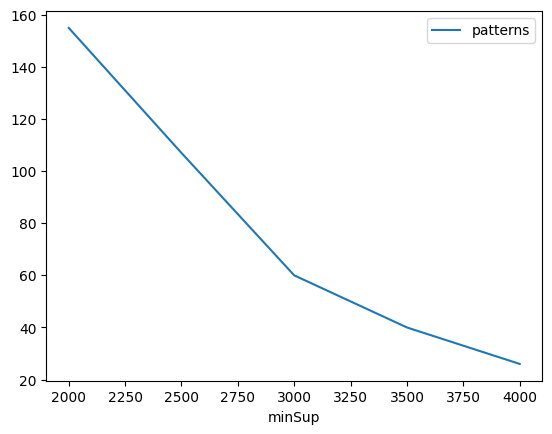

Graph for No Of Patterns is successfully generated!


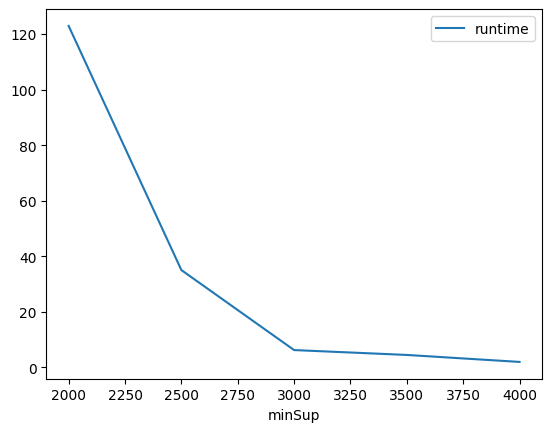

Graph for Runtime taken is successfully generated!


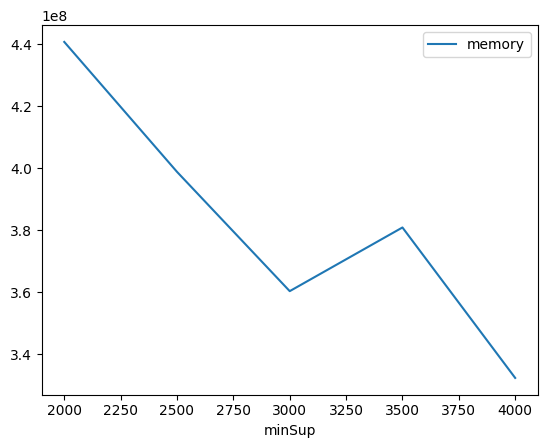

Graph for memory consumption is successfully generated!


In [17]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [18]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
